In [50]:
!pip install "google-cloud-aiplatform>=1.38"

In [51]:
!gcloud auth login


You are running on a Google Compute Engine virtual machine.
It is recommended that you use service accounts for authentication.

You can run:

  $ gcloud config set account `ACCOUNT`

to switch accounts if necessary.

Your credentials may be visible to others with access to this
virtual machine. Are you sure you want to authenticate with
your personal account?

Do you want to continue (Y/n)?  Y

Go to the following link in your browser, and complete the sign-in prompts:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=32555940559.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fsdk.cloud.google.com%2Fauthcode.html&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fappengine.admin+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fsqlservice.login+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcompute+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
import io
import http.client
import typing
import urllib.request
import base64
from PIL import Image as PILImage
import matplotlib.pyplot as plt
import vertexai
import vertexai.preview
from google.cloud import aiplatform
from vertexai.preview.generative_models import GenerativeModel, Image
vertexai.init(project="nimble-chimera-424600-r1", location="us-central1")

In [ ]:
def chat_gemini(prompt):
   model_name = "gemini-1.0-pro"

   model = GenerativeModel(model_name)
   response = model.generate_content(prompt)

   return response.text

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
import pandas as pd

df = pd.read_excel("/content/drive/MyDrive/korean_essay_최종.xlsx")

df = df.drop_duplicates(subset=['생성 Text'])
df.reset_index(drop=True, inplace=True)

print(f"length : {len(df)}")
display(df.head())

length : 502


,ID,model,대학,제시문,중간,문제,공백,생성 Text,비고
0,NaN,GPT-3.5,2012학년도 연세대학교 논술(사회계열) 입학시험 문제,제시문 (가)\n새로운 종교를 창설하려는 여러 번의 시도가 실패로 끝난 것은 상당히...,\n,한 사회에 새로움이 부상하는 과정에서 다수가 수행하는 역할을 중심으로 제시문 (가)...,,\n제시문 (가)는 역사적으로 새로운 종교를 창설하려는 시도가 실패로 끝났음에도 불...,NaN
1,NaN,GPT-3.5,2013학년도 연세대학교 논술(사회계열) 입학시험 문제,(가)\n가-1. \n기원전 4세기경 그리스 철학자 데모스테네스는 “자기를 속이는 ...,\n,"제시문 (가-2)를 바탕으로 제시문 (나)와 (다)를 비교 분석하시오. (1,000...",,제시문 가-2에서는 돈 키호테와 산초의 대화를 통해 현실과 환상 사이의 갈등이 나타...,NaN
2,NaN,GPT-3.5,2013학년도 연세대학교 논술(인문계열) 입학시험 문제,"제시문 (가)\n강녕의 용반, 소주의 등위, 항주의 서계는 모두 매화 산지이다.\n...",\n,"제시문 (가), (나), (다)에 공통된 주제어를 찾고, 이를 바탕으로 제시문 (가...",,"주제어로 선택된 공통 키워드는 ""아름다움""입니다.\n\n제시문 (가)에서는 매화의 ...",NaN
3,NaN,GPT-3.5,2014학년도 연세대학교 수시모집 논술 (사회계열) 입학시험 문제지,제시문 (가)\n개인에 있어서의 합리적인 선택 원칙을 사회 전체에 적용할 수 있으려...,\n,개인과 사회는 서로 영향을 미칠 수 있다. 개인이 사회에 영향을 미치는 정도가 높은...,,네 제시문들의 순서를 정하기 위해서는 각 제시문이 개인과 사회 간 영향을 어떻게 다...,NaN
4,NaN,GPT-3.5,2014학년도 연세대학교 수시모집 논술 (사회계열) 입학시험 문제지,제시문 (가)\n개인에 있어서의 합리적인 선택 원칙을 사회 전체에 적용할 수 있으려...,\n,현대 사회에서는 구성원 상호간에 서로 상충된 요구와 주장들이 늘어나고 있다. 이와 ...,,네 제시문들에는 현대 사회에서의 갈등 상황에 대한 다양한 해법과 접근 방식이 내포되...,NaN


In [58]:
test_df = df
test_df = test_df[['생성 Text', 'model']]
test_df['label'] = test_df['model'].apply(lambda x: 1 if 'gpt' in str(x).lower() else 0)
test_df = test_df[['생성 Text','label']]
test_df.head()

<ipython-input-58-7a19001825f6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['label'] = test_df['model'].apply(lambda x: 1 if 'gpt' in str(x).lower() else 0)


,생성 Text,label
0,\n제시문 (가)는 역사적으로 새로운 종교를 창설하려는 시도가 실패로 끝났음에도 불...,1
1,제시문 가-2에서는 돈 키호테와 산초의 대화를 통해 현실과 환상 사이의 갈등이 나타...,1
2,"주제어로 선택된 공통 키워드는 ""아름다움""입니다.\n\n제시문 (가)에서는 매화의 ...",1
3,네 제시문들의 순서를 정하기 위해서는 각 제시문이 개인과 사회 간 영향을 어떻게 다...,1
4,네 제시문들에는 현대 사회에서의 갈등 상황에 대한 다양한 해법과 접근 방식이 내포되...,1


In [59]:
test_df['generated_probabilty'] = ['NULL']*502
test_df.head()

,생성 Text,label,generated_probabilty
0,\n제시문 (가)는 역사적으로 새로운 종교를 창설하려는 시도가 실패로 끝났음에도 불...,1,NULL
1,제시문 가-2에서는 돈 키호테와 산초의 대화를 통해 현실과 환상 사이의 갈등이 나타...,1,NULL
2,"주제어로 선택된 공통 키워드는 ""아름다움""입니다.\n\n제시문 (가)에서는 매화의 ...",1,NULL
3,네 제시문들의 순서를 정하기 위해서는 각 제시문이 개인과 사회 간 영향을 어떻게 다...,1,NULL
4,네 제시문들에는 현대 사회에서의 갈등 상황에 대한 다양한 해법과 접근 방식이 내포되...,1,NULL


In [60]:
import time

results = []

for i in range(len(test_df)):
  generated_text = test_df.iloc[i,0]
  prompt_template = f'''
  ### Instruction

  I will give you some sentence written in korean
  Please answer only in number which means the probabilty that the written text
  is generated by LLM(AI)
  Please only answer between 0 and 100 and your answer should only in number format.
  Do not answer multiple number format only one number answer should be returned.

  And here is my total Sentence
  {generated_text}
  '''

  answer = chat_gemini(prompt_template)
  results.append(answer)
  time.sleep(3)

  if i%10 == 0:
    print(f"progress : {i}")

test_df['generated_probability'] = results

progress : 0
progress : 10
progress : 20
progress : 30
progress : 40
progress : 50
progress : 60
progress : 70
progress : 80
progress : 90
progress : 100
progress : 110
progress : 120
progress : 130
progress : 140
progress : 150
progress : 160
progress : 170
progress : 180
progress : 190
progress : 200
progress : 210
progress : 220
progress : 230
progress : 240
progress : 250
progress : 260
progress : 270
progress : 280
progress : 290
progress : 300
progress : 310
progress : 320
progress : 330
progress : 340
progress : 350
progress : 360
progress : 370
progress : 380
progress : 390
progress : 400
progress : 410
progress : 420
progress : 430
progress : 440
progress : 450
progress : 460
progress : 470
progress : 480
progress : 490
progress : 500


In [64]:
test_df.to_excel('/content/drive/MyDrive/result.xlsx',index=False)

In [65]:
test_df.head()

,생성 Text,label,generated_probabilty,generated_probability
0,\n제시문 (가)는 역사적으로 새로운 종교를 창설하려는 시도가 실패로 끝났음에도 불...,1,NULL,## 확률 분석 결과:\n\n**제시문 (가): 95**\n**제시문 (나): 70...
1,제시문 가-2에서는 돈 키호테와 산초의 대화를 통해 현실과 환상 사이의 갈등이 나타...,1,NULL,55
2,"주제어로 선택된 공통 키워드는 ""아름다움""입니다.\n\n제시문 (가)에서는 매화의 ...",1,NULL,30
3,네 제시문들의 순서를 정하기 위해서는 각 제시문이 개인과 사회 간 영향을 어떻게 다...,1,NULL,## 70 \n\nThis is a complex question that requ...
4,네 제시문들에는 현대 사회에서의 갈등 상황에 대한 다양한 해법과 접근 방식이 내포되...,1,NULL,75


In [66]:
import re

def extract_and_average_integers_from_text(text):
    integers = [int(num) for num in re.findall(r'\b\d+\b', text)]  # 정수 추출 후 정수로 변환하여 리스트에 저장
    if not integers:
        return None  # 정수가 없으면 None 반환
    average = sum(integers) / len(integers)  # 평균값 계산
    return average

In [68]:
# 테스트를 위한 문자열
test_text = "문자열에서 10 정수를 0 추출하는 0 정규식입니다."

extract_and_average_integers_from_text(test_text)

3.3333333333333335

In [70]:
fixed_results = []
for result in results:
  fixed_result = extract_and_average_integers_from_text(result)
  fixed_results.append(fixed_result)

In [71]:
fixed_results

[75.0,
 55.0,
 30.0,
 70.0,
 75.0,
 65.0,
 85.0,
 75.0,
 60.0,
 75.0,
 85.0,
 70.0,
 55.0,
 85.0,
 40.0,
 65.0,
 35.0,
 75.0,
 95.0,
 75.0,
 75.0,
 85.0,
 70.0,
 88.0,
 78.0,
 78.0,
 75.0,
 85.0,
 80.0,
 65.0,
 85.0,
 85.0,
 60.0,
 55.0,
 60.0,
 99.0,
 85.0,
 20.0,
 70.0,
 75.0,
 72.5,
 85.0,
 75.0,
 75.0,
 75.0,
 55.0,
 85.0,
 0.0,
 85.0,
 85.0,
 40.0,
 72.25,
 50.0,
 85.0,
 75.0,
 40.0,
 75.0,
 75.0,
 85.0,
 85.0,
 85.0,
 45.0,
 45.0,
 85.0,
 85.0,
 85.0,
 40.0,
 70.0,
 80.0,
 75.0,
 56.0,
 75.0,
 70.0,
 30.0,
 75.0,
 85.0,
 70.0,
 54.0,
 55.0,
 60.0,
 75.0,
 95.0,
 75.0,
 75.0,
 55.0,
 42.0,
 80.0,
 78.0,
 73.0,
 50.0,
 70.0,
 70.0,
 82.0,
 75.0,
 75.0,
 60.0,
 75.0,
 85.0,
 85.0,
 45.0,
 70.0,
 43.10344827586207,
 95.0,
 75.0,
 85.0,
 70.0,
 65.0,
 75.0,
 50.0,
 55.0,
 85.0,
 73.33333333333333,
 50.0,
 85.0,
 80.0,
 87.0,
 60.0,
 50.0,
 10.0,
 95.0,
 75.0,
 40.0,
 65.0,
 90.0,
 85.0,
 85.0,
 47.5,
 85.0,
 30.0,
 86.0,
 80.0,
 85.0,
 75.0,
 75.0,
 75.0,
 85.0,
 85.0,
 99.0,
 65.0,
 

In [72]:
test_df['fixed_probability'] = fixed_results

In [73]:
test_df.head()

,생성 Text,label,generated_probabilty,generated_probability,fixed_probability
0,\n제시문 (가)는 역사적으로 새로운 종교를 창설하려는 시도가 실패로 끝났음에도 불...,1,NULL,## 확률 분석 결과:\n\n**제시문 (가): 95**\n**제시문 (나): 70...,75.0
1,제시문 가-2에서는 돈 키호테와 산초의 대화를 통해 현실과 환상 사이의 갈등이 나타...,1,NULL,55,55.0
2,"주제어로 선택된 공통 키워드는 ""아름다움""입니다.\n\n제시문 (가)에서는 매화의 ...",1,NULL,30,30.0
3,네 제시문들의 순서를 정하기 위해서는 각 제시문이 개인과 사회 간 영향을 어떻게 다...,1,NULL,## 70 \n\nThis is a complex question that requ...,70.0
4,네 제시문들에는 현대 사회에서의 갈등 상황에 대한 다양한 해법과 접근 방식이 내포되...,1,NULL,75,75.0


ROC-AUC 면적: 0.48572178477690287


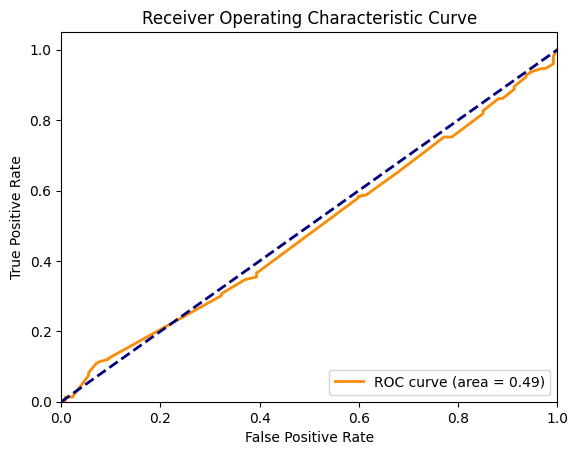

In [74]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 실제 라벨
y_true = test_df['label'].values

# ROC 곡선 그리기
fpr, tpr, thresholds = roc_curve(y_true, fixed_results)
roc_auc = auc(fpr, tpr)

# ROC 곡선 시각화
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")

# ROC-AUC 면적 출력
print("ROC-AUC 면적:", roc_auc)

plt.show()

In [79]:
from sklearn.metrics import f1_score

# F1 스코어 계산
y_pred = [1 if score > 50 else 0 for score in fixed_results]  # fixed_results는 모델 예측 결과로 가정
f1 = f1_score(y_true, y_pred)

# F1 스코어 출력
print("F1 Score:", f1)

F1 Score: 0.7818411097099621
